# Regularized Linear Regression and Bias v.s. Variance

## Regularized Linear Regression

### Visualizing the dataset

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import scipy.optimize as opt
import seaborn as sns

%matplotlib inline

dataset = sio.loadmat('ex5data1.mat')

dataset

X_train, y_train = dataset['X'], dataset['y']
X_train.shape, y_train.shape

X_val, y_val = dataset['Xval'], dataset['yval']
X_val.shape, y_val.shape

X_test, y_test = dataset['Xtest'], dataset['ytest']
X_test.shape, y_test.shape

In [2]:
def load_data():
    """for ex5
    d['X'] shape = (12, 1)
    pandas has trouble taking this 2d ndarray to construct a dataframe, so I ravel
    the results
    """
    d = sio.loadmat('ex5data1.mat')
    return map(np.ravel, [d['X'], d['y'], d['Xval'], d['yval'], d['Xtest'], d['ytest']])

In [3]:
X_train, y_train, Xval, yval, Xtest, ytest = load_data()

Text(0, 0.5, 'water flowing out of the dam')

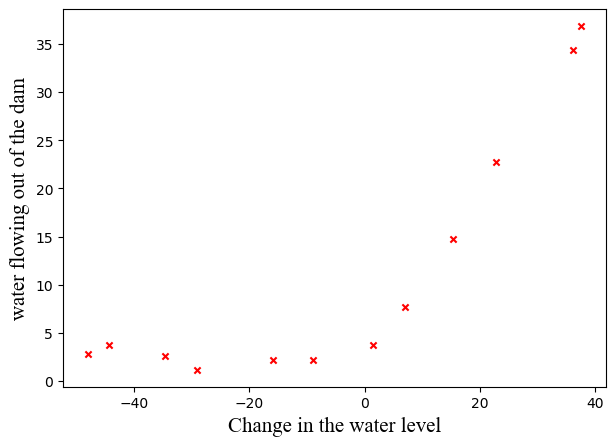

In [4]:
fig = plt.figure(1, (7,5), dpi = 100)
ax = plt.subplot(111)
plt.sca(ax)

font = {'family' : 'Times New Roman','weight' : 'normal','size'   : 15}
plt.scatter(X_train, y_train, s=20, alpha=1, c='r', marker='x')
plt.xlabel('Change in the water level', font)
plt.ylabel('water flowing out of the dam', font)

In [5]:
X_train, Xval, Xtest = [np.insert(x.reshape(x.shape[0], 1), 0, np.ones(x.shape[0]), axis=1) for x in (X_train, Xval, Xtest)]

In [6]:
X_train.shape, Xval.shape, Xtest.shape

((12, 2), (21, 2), (21, 2))

# Cost function and gradient
- Regularized linear regression cost function
- Regularized linear regression gradient

In [7]:
a = np.ones((2,3))
b = np.array([[1,2,3], [2,3,4]])
a.T @ b

array([[3., 5., 7.],
       [3., 5., 7.],
       [3., 5., 7.]])

In [8]:
def linearRegCostFunction(theta, X, y, lambda_r):
    """
    X: R(m*n), m records, n features
    y: R(m)
    theta : R(n), linear regression parameters
    """
    ### calculate cost
    m = X.shape[0]
    inner = X @ theta.T - y
    
    square_sum = inner @ inner.T
    cost = square_sum / (2. * m) + lambda_r / (2. * m) * (theta @ theta.T)
    
#     ### calculate gradient
#     regularized_term = theta.copy()  # same shape as theta
#     regularized_term[0] = 0  # don't regularize intercept theta
#     grad = X.T @ inner / m + lambda_r / m * regularized_term
    
    return cost

In [9]:
def RegGradient(theta, X, y, lambda_r):
    
    m = X.shape[0]
    inner = X @ theta.T - y
    
    ### calculate gradient
    regularized_term = theta.copy()  # same shape as theta
    regularized_term[0] = 0  # don't regularize intercept theta
    grad = X.T @ inner / m + lambda_r / m * regularized_term
    
    return grad

In [10]:
theta = np.ones(X_train.shape[1])
linearRegCostFunction(theta, X_train, y_train, 1)

304.0348588869309

In [11]:
RegGradient(theta, X_train, y_train, 1)

array([-15.30301567, 598.25074417])

# Fitting linear regression
- Using optimize module

In [12]:
def FittingLinearReg(X, y, lambda_r):
    """linear regression
    args:
        X: feature matrix, (m, n+1) # with incercept x0=1
        y: target vector, (m, )
        l: lambda constant for regularization

    return: trained parameters
    """
    
    # init theta
    theta = np.ones(X.shape[1])
    
    # train it
    res = opt.minimize(fun=linearRegCostFunction,
                       x0=theta,
                       args=(X, y, lambda_r),
                       method='TNC',
                       jac=RegGradient,
                       options={'disp': True})
    
    return res

In [13]:
theta = np.ones(X_train.shape[0])

final_theta = FittingLinearReg(X_train, y_train, 0).get('x')

In [14]:
b, m = final_theta

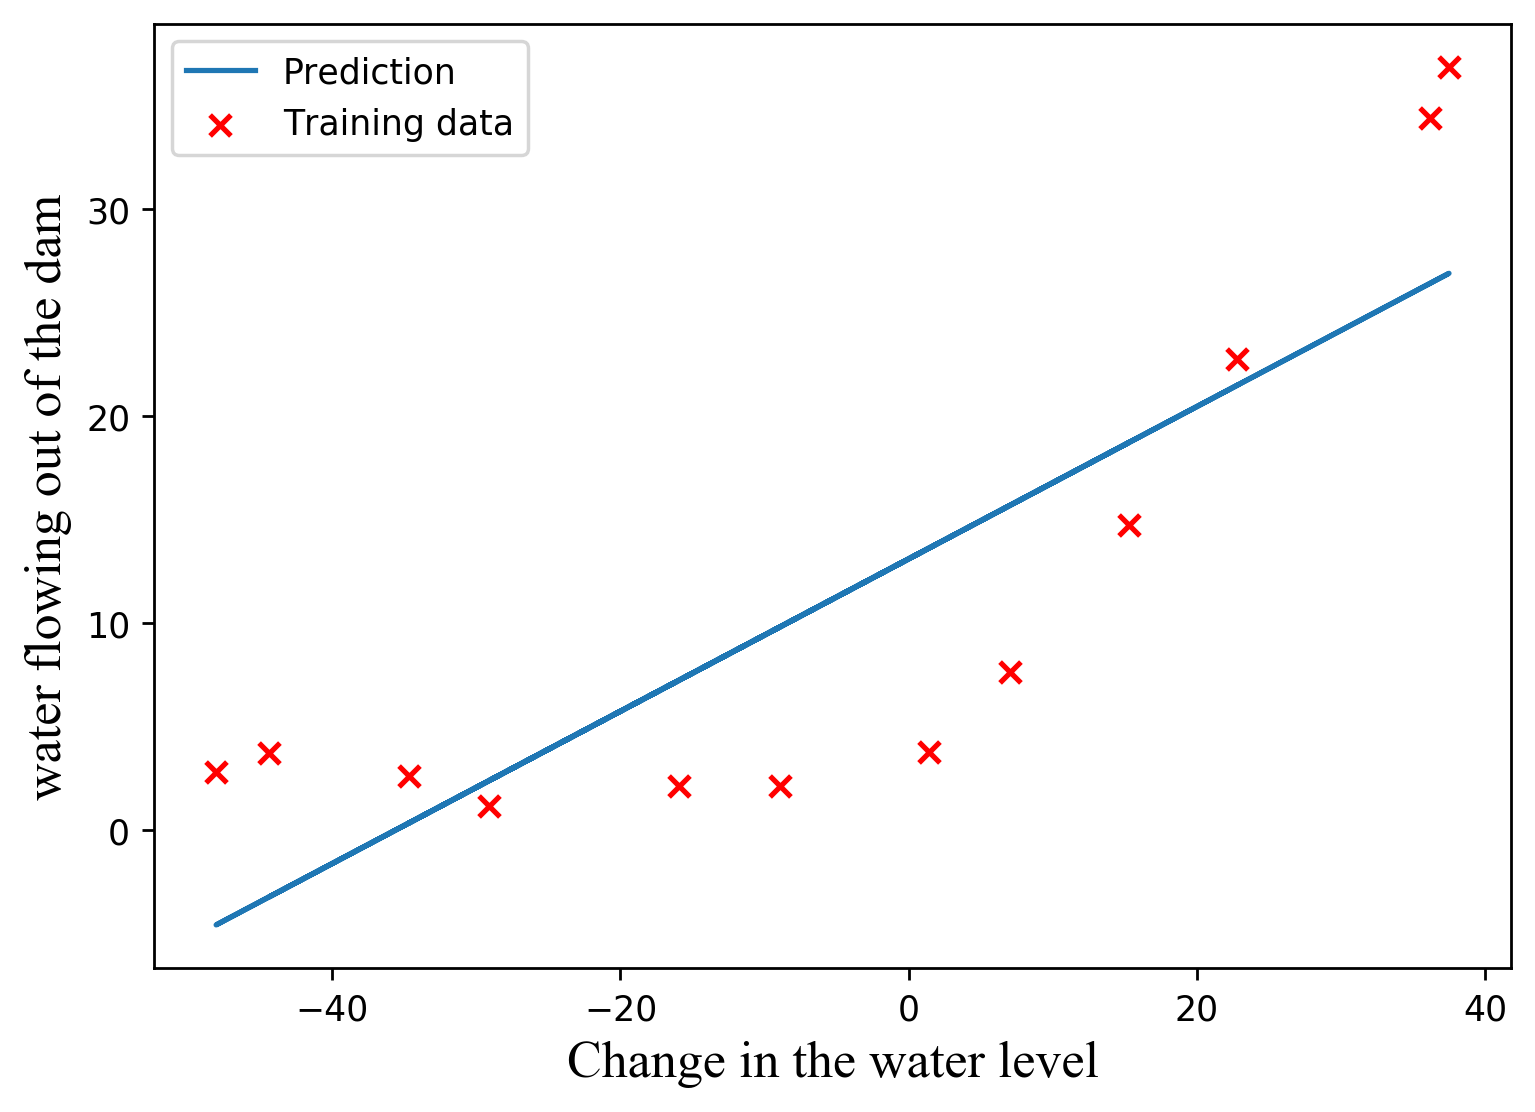

In [15]:
fig = plt.figure(1, (7,5), dpi = 250)
ax = plt.subplot(111)
plt.sca(ax)

font = {'family' : 'Times New Roman','weight' : 'normal','size'   : 15}
plt.scatter(X_train[:,1], y_train, label="Training data", c = 'r', marker='x')
plt.plot(X_train[:, 1], X_train[:, 1]*m + b, label="Prediction")

plt.xlabel('Change in the water level', font)
plt.ylabel('water flowing out of the dam', font)

plt.legend(loc=2)
plt.show()

# Bias-variance

In [16]:
error_train, error_val = [], []

- 1.Using subsets of training set to fit the model
- 2.No regularization term
- 3.Using the same subsets to calculate the cost

In [17]:
m = X_train.shape[0]
for i in range(1, m+1):
    res = FittingLinearReg(X_train[:i, :], y_train[:i], lambda_r=0)
    
    err_train = linearRegCostFunction(res.x, X_train[:i, :], y_train[:i], 0)
    err_val = linearRegCostFunction(res.x, Xval, yval, 0)
    
    error_train.append(err_train)
    error_val.append(err_val)

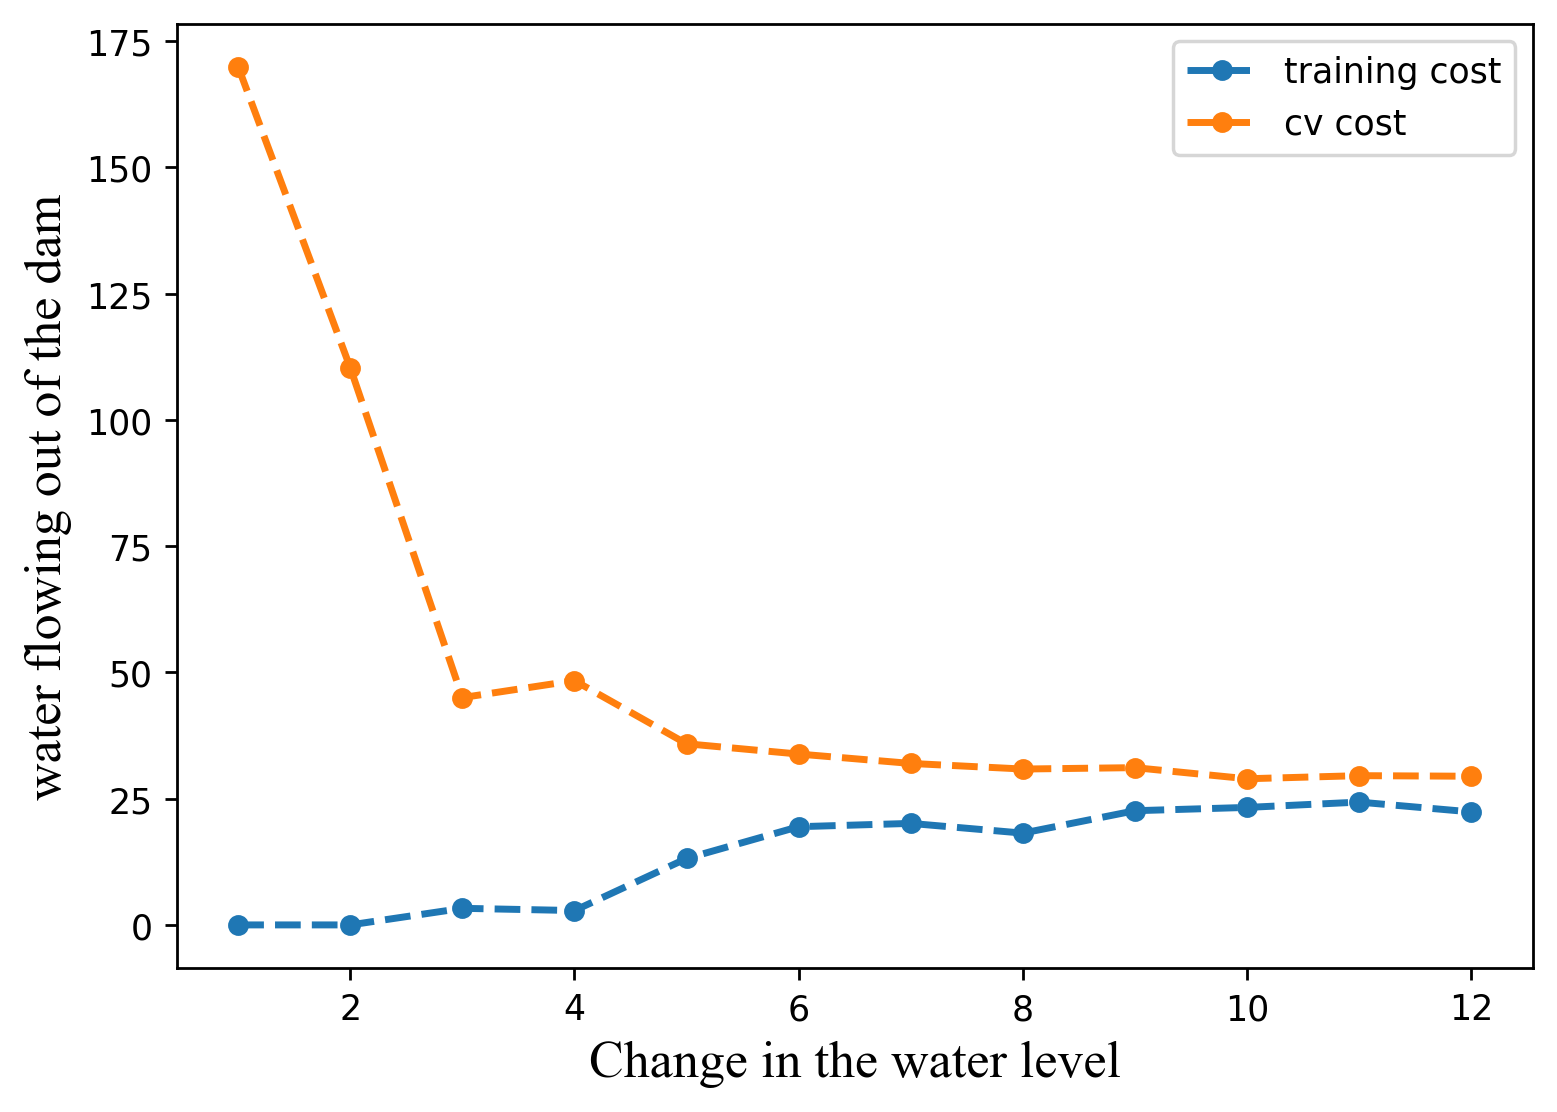

In [18]:
fig = plt.figure(1, (7,5), dpi = 250)
ax = plt.subplot(111)
plt.sca(ax)

font = {'family' : 'Times New Roman','weight' : 'normal','size'   : 15}
plt.plot(np.arange(1, m+1), error_train, label='training cost',marker='o', 
         linestyle='dashed', linewidth=2, markersize=5)
plt.plot(np.arange(1, m+1), error_val, label='cv cost',marker='o', 
         linestyle='dashed', linewidth=2, markersize=5)
# plt.(np.arange(1, m+1), error_train, label='training cost')
# plt.plot(np.arange(1, m+1), error_val, label='cv cost')
plt.xlabel('Change in the water level', font)
plt.ylabel('water flowing out of the dam', font)

plt.legend(loc=1)
plt.show()

# Polynomial regression
## Create polynomial features

In [19]:
def poly_features(x, power):
    poly_array = np.zeros((x.shape[0], power))
    for i in range(power):
        poly_array[:, i] = np.power(x, i+1)

    return poly_array

In [20]:
X, y, Xval, yval, Xtest, ytest = load_data()
re = poly_features(X, 3)

## Normalization

In [21]:
re

array([[-1.59367581e+01,  2.53980260e+02, -4.04762197e+03],
       [-2.91529792e+01,  8.49896197e+02, -2.47770062e+04],
       [ 3.61895486e+01,  1.30968343e+03,  4.73968522e+04],
       [ 3.74921873e+01,  1.40566411e+03,  5.27014222e+04],
       [-4.80588295e+01,  2.30965109e+03, -1.10999128e+05],
       [-8.94145794e+00,  7.99496701e+01, -7.14866612e+02],
       [ 1.53077929e+01,  2.34328523e+02,  3.58705250e+03],
       [-3.47062658e+01,  1.20452489e+03, -4.18045609e+04],
       [ 1.38915437e+00,  1.92974986e+00,  2.68072045e+00],
       [-4.43837599e+01,  1.96991814e+03, -8.74323736e+04],
       [ 7.01350208e+00,  4.91892115e+01,  3.44988637e+02],
       [ 2.27627489e+01,  5.18142738e+02,  1.17943531e+04]])

In [22]:
def Norm_feature(polyArray):
    std = np.std(polyArray, axis=0, ddof=0)##
    for i in range(polyArray.shape[1]):
        polyArray[:, i] = (polyArray[:, i] - polyArray[:, i].mean())/ std[i]
                           
    return polyArray

In [23]:
Norm_feature(re)

array([[-3.78243704e-01, -7.88662325e-01,  1.90328720e-01],
       [-8.38920100e-01,  1.31420204e-03, -2.58961742e-01],
       [ 1.43871736e+00,  6.10831582e-01,  1.30534069e+00],
       [ 1.48412330e+00,  7.38068463e-01,  1.42031240e+00],
       [-1.49791929e+00,  1.93643966e+00, -2.12774745e+00],
       [-1.34409278e-01, -1.01936614e+00,  2.62563148e-01],
       [ 7.10844248e-01, -8.14713668e-01,  3.55803314e-01],
       [-1.03249041e+00,  4.71428060e-01, -6.28018432e-01],
       [ 2.25683763e-01, -1.12279332e+00,  2.78115330e-01],
       [-1.36981778e+00,  1.48607235e+00, -1.61695958e+00],
       [ 4.21731046e-01, -1.06014377e+00,  2.85534542e-01],
       [ 9.70700848e-01, -4.38475085e-01,  5.33689054e-01]])

## Prepare polynomial array

In [24]:
def polyData(*args, power):
    """
    Return a array where column 1 holds the original values of X, 
    column 2 holds the values of X.^2, column 3 holds the values of X.^3, and so on.
    Do not have to account for the zero-eth power in this function.
    """
    def prepare(x):
        # expand feature
        polyArray = poly_features(x, power=power)
#         print(polyArray.shape)
        # normalization
        ndarr = Norm_feature(polyArray)
#         print(ndarr.shape)

        # add intercept term
        return np.insert(ndarr, 0, np.ones(ndarr.shape[0]), axis=1)

    return [prepare(x) for x in args]

In [25]:
X, y, Xval, yval, Xtest, ytest = load_data()

In [26]:
X_poly, Xval_poly, Xtest_poly= polyData(X, Xval, Xtest, power=8)
X_poly[:3, :]

array([[ 1.00000000e+00, -3.78243704e-01, -7.88662325e-01,
         1.90328720e-01, -7.37591303e-01,  3.20251970e-01,
        -6.17151602e-01,  3.59835014e-01, -5.31091256e-01],
       [ 1.00000000e+00, -8.38920100e-01,  1.31420204e-03,
        -2.58961742e-01, -3.41564822e-01,  9.75492734e-02,
        -4.55196644e-01,  2.66773432e-01, -4.68873807e-01],
       [ 1.00000000e+00,  1.43871736e+00,  6.10831582e-01,
         1.30534069e+00,  2.56220001e-01,  1.02186338e+00,
        -1.26962121e-02,  7.90210009e-01, -1.77926980e-01]])

# Plot learning rate curve

In [27]:
def plot_learning_curve(X, y, Xval, yval, l):
    er_train, er_cv = [], []
    m = X.shape[0]

    for i in range(1, m + 1):
        # regularization applies here for fitting parameters
        res = FittingLinearReg(X[:i, :], y[:i], l)

        # remember, when you compute the cost here, you are computing
        # non-regularized cost. Regularization is used to fit parameters only
        tc = linearRegCostFunction(res.x, X[:i, :], y[:i], lambda_r=0)
        cv = linearRegCostFunction(res.x, Xval, yval, lambda_r=0)

        er_train.append(tc)
        er_cv.append(cv)
        
    fig = plt.figure(1, (7,5), dpi = 250)
    ax = plt.subplot(111)
    plt.sca(ax)
    font = {'family' : 'Times New Roman','weight' : 'normal','size'   : 15}
    plt.plot(np.arange(1, m+1), er_train, label='training cost',marker='o', 
             linestyle='dashed', linewidth=2, markersize=5)
    plt.plot(np.arange(1, m+1), er_cv, label='cv cost',marker='o', 
             linestyle='dashed', linewidth=2, markersize=5)
    # plt.(np.arange(1, m+1), error_train, label='training cost')
    # plt.plot(np.arange(1, m+1), error_val, label='cv cost')
#     plt.ylim(0, 150)
    plt.xlabel('Number of training examples', font)
    plt.ylabel('Error', font)
    plt.legend(loc=1)

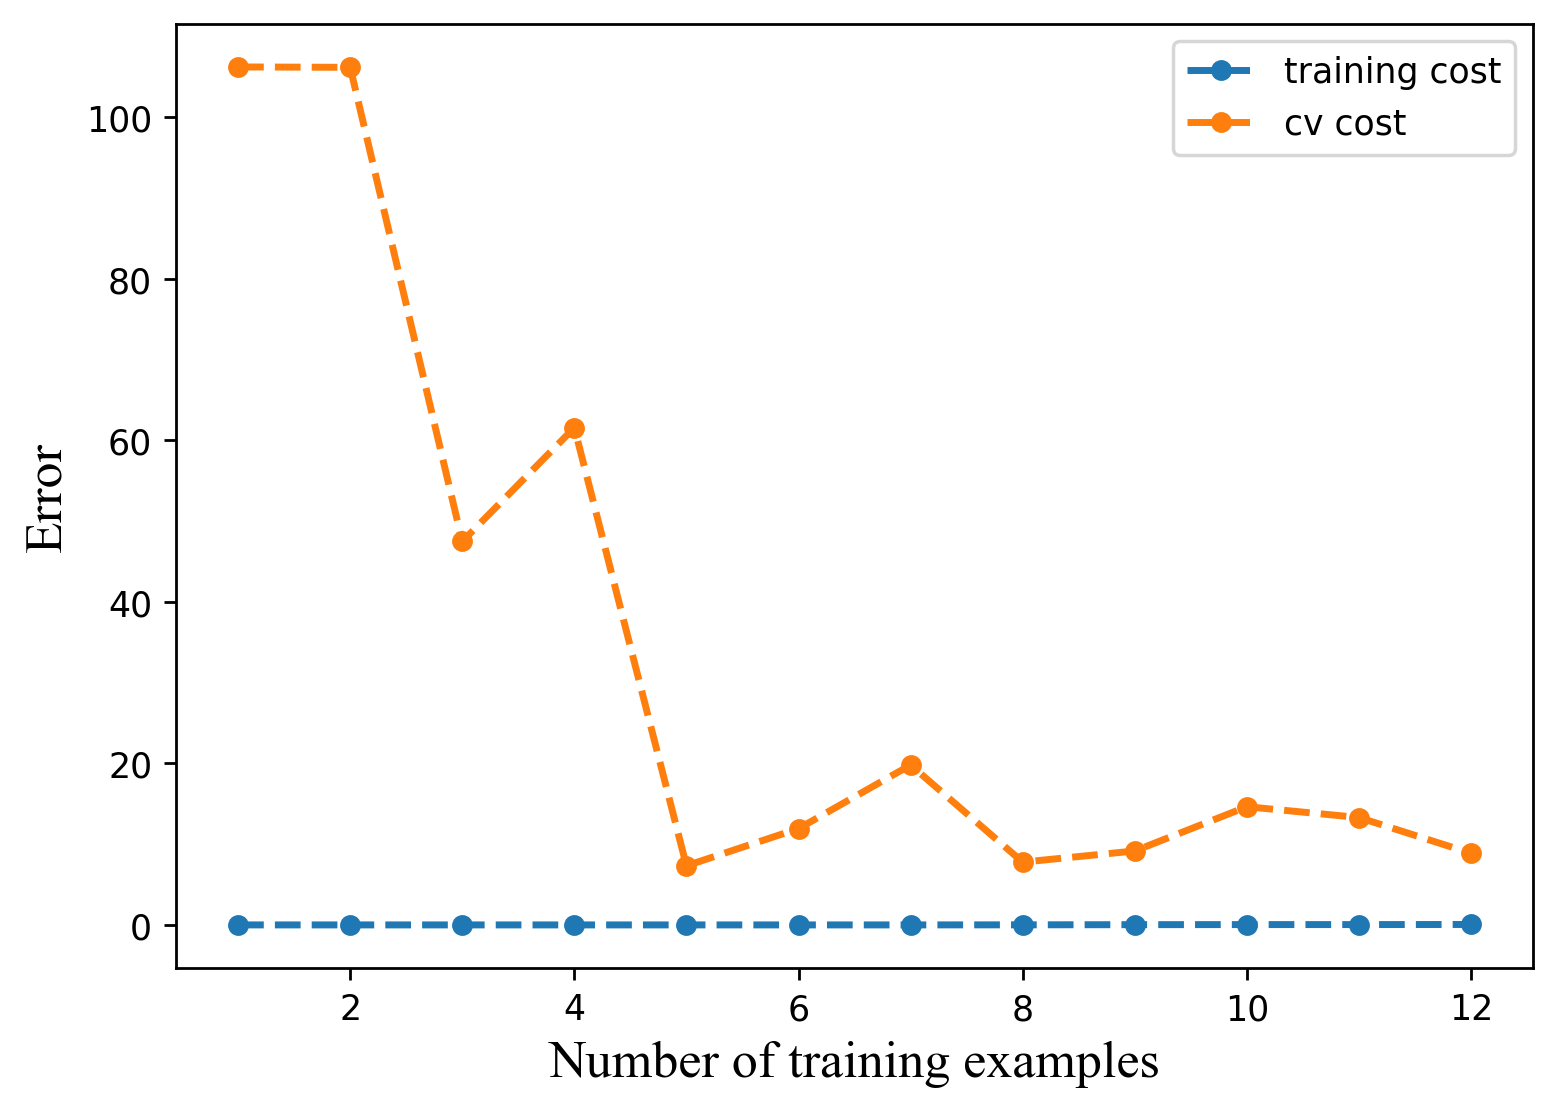

In [28]:
plot_learning_curve(X_poly, y, Xval_poly, yval, 0)
plt.show()

## try $\lambda=1$

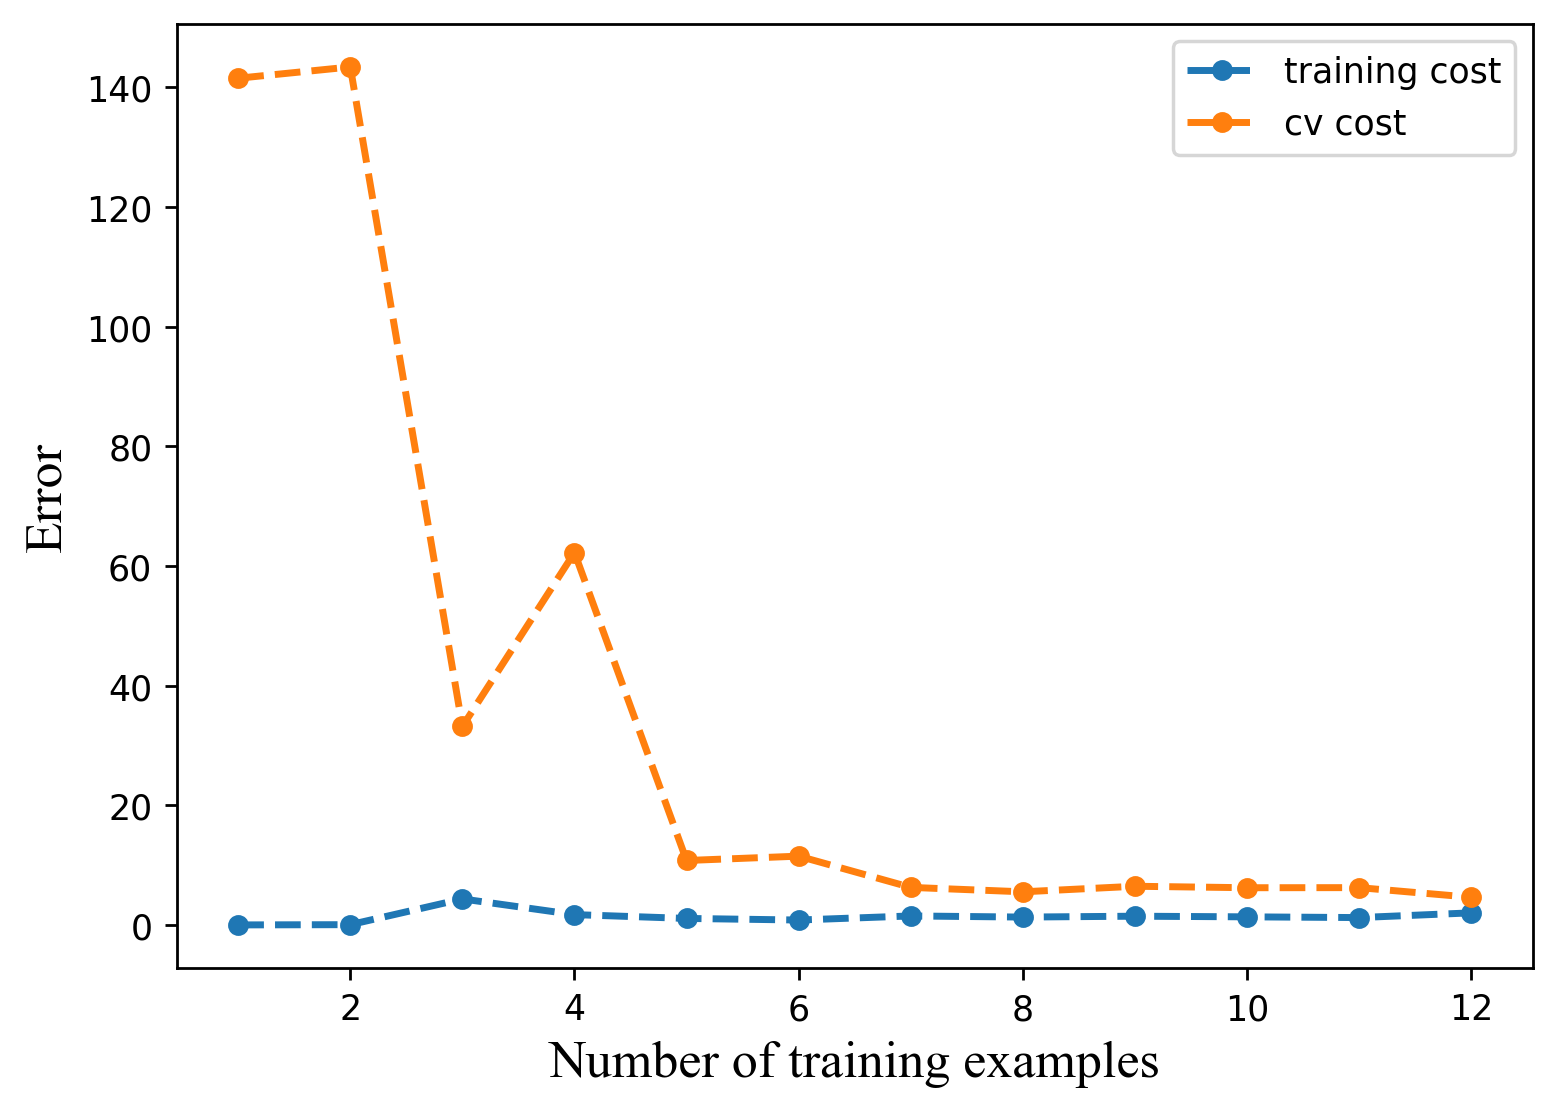

In [29]:
plot_learning_curve(X_poly, y, Xval_poly, yval, l=1)
plt.show()

## try $\lambda=10$

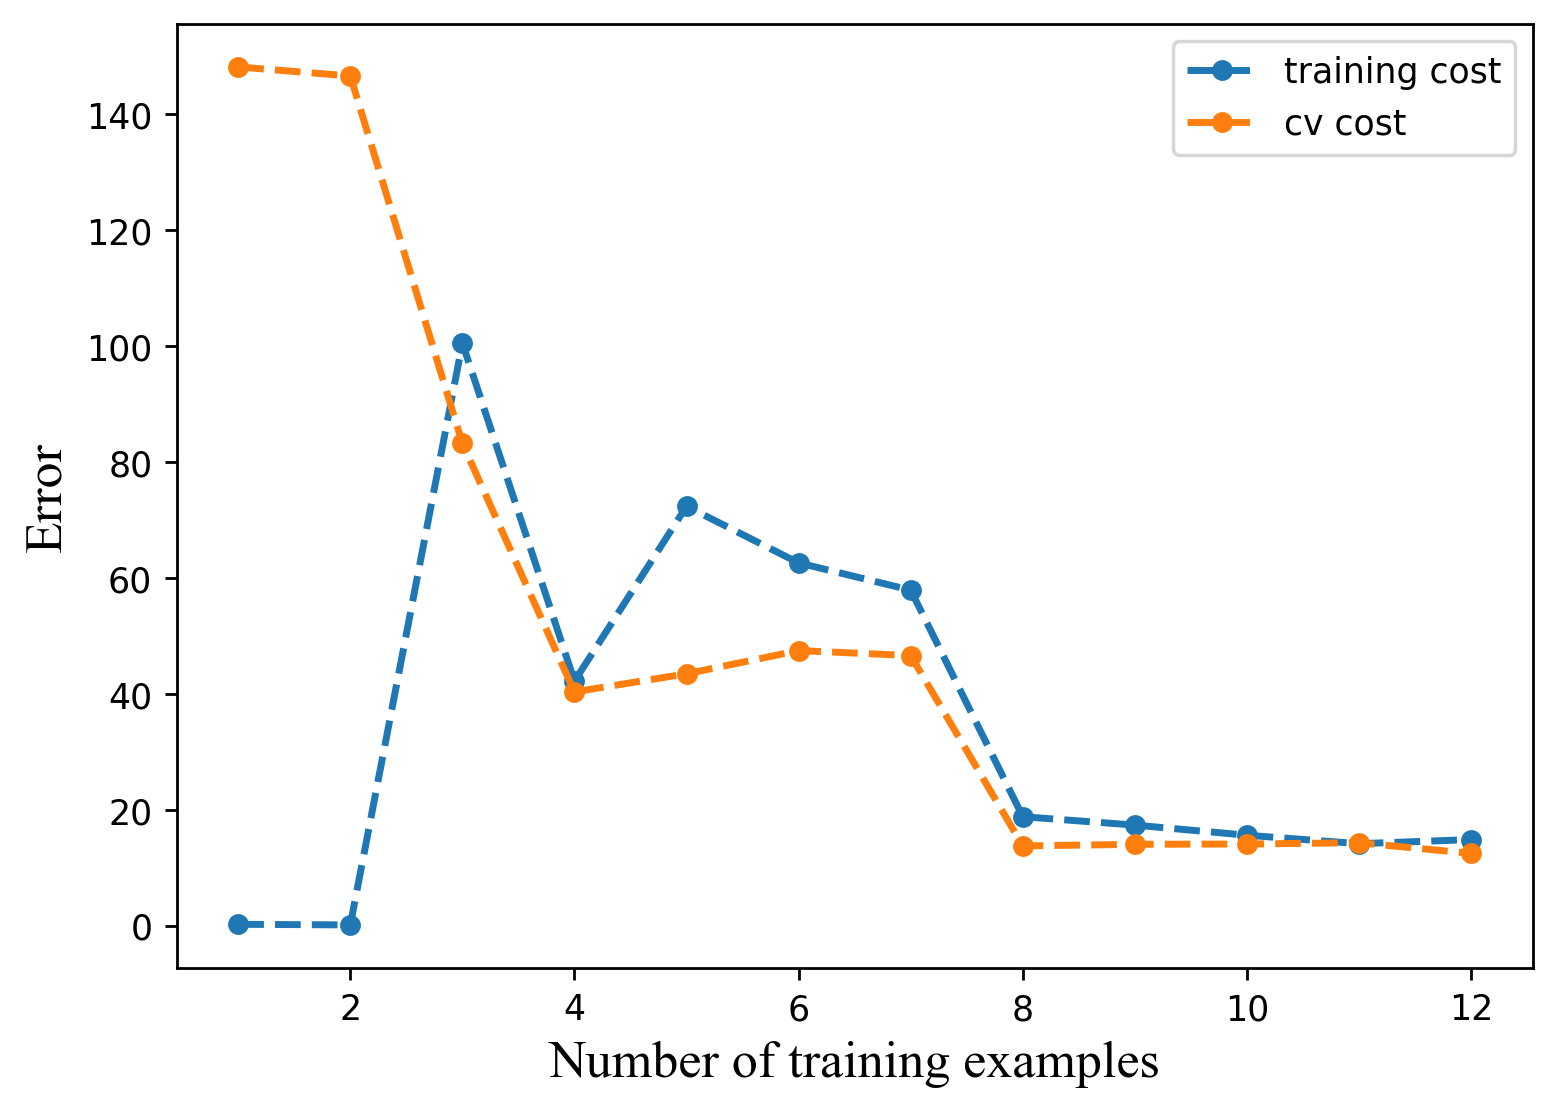

In [30]:
plot_learning_curve(X_poly, y, Xval_poly, yval, 10)
plt.show()

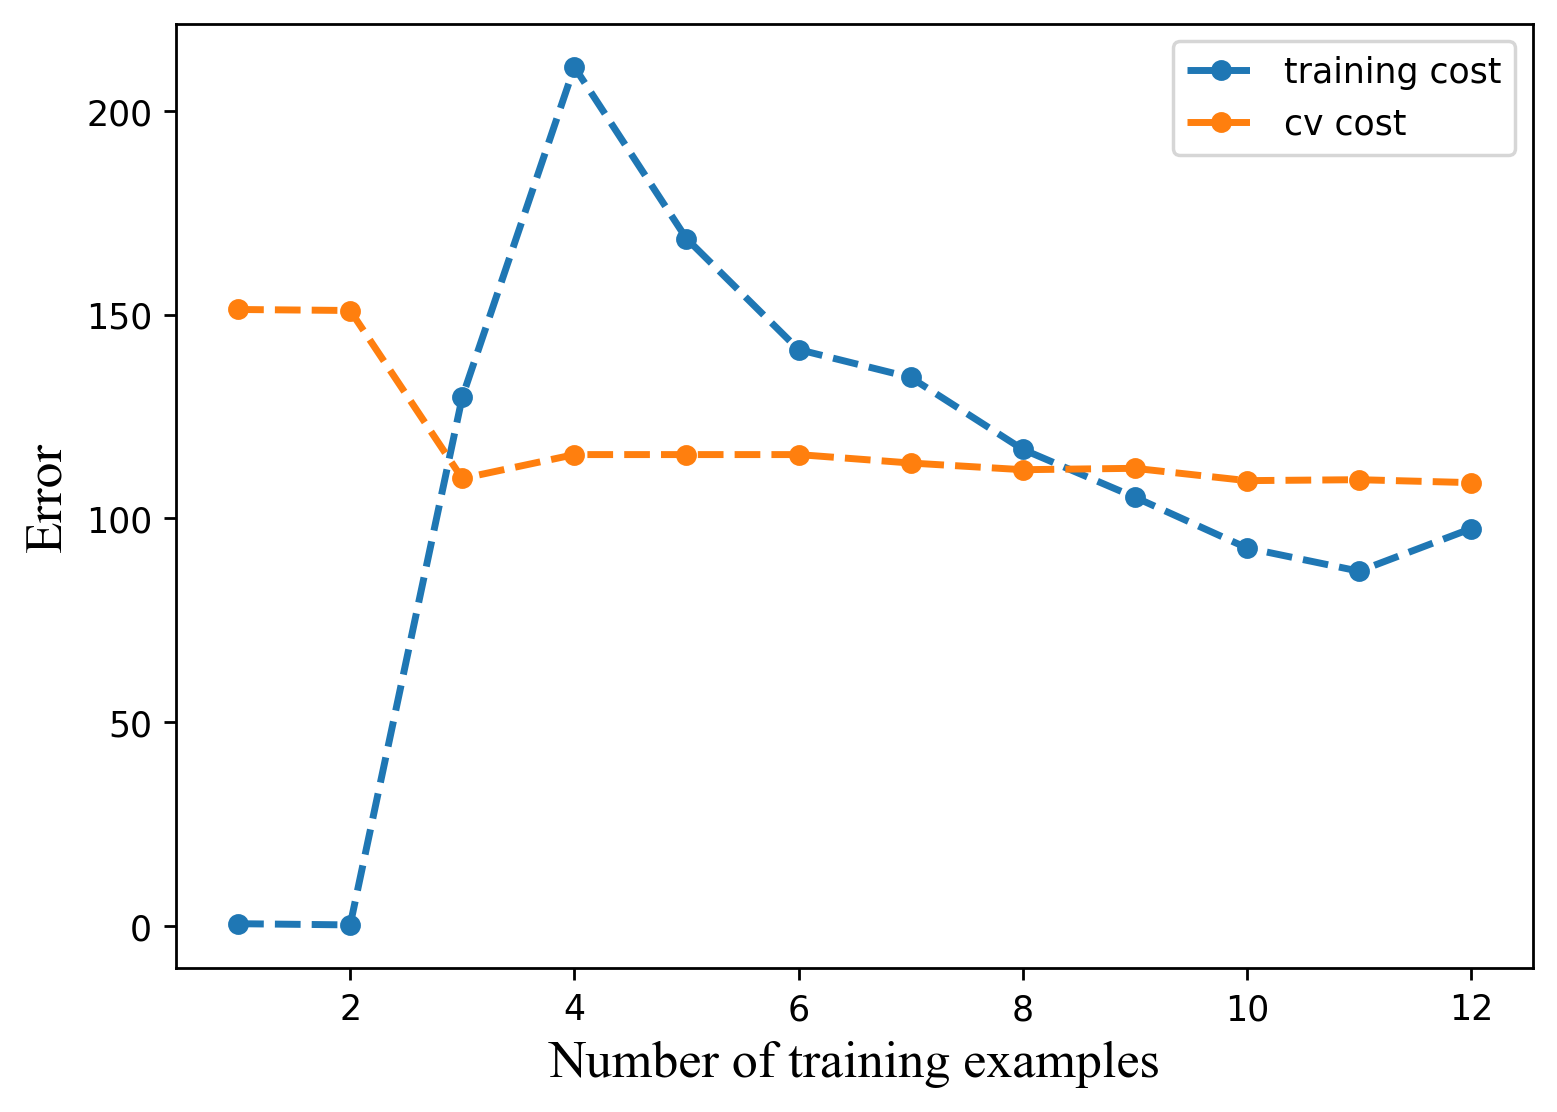

In [31]:
plot_learning_curve(X_poly, y, Xval_poly, yval, 100)
plt.show()

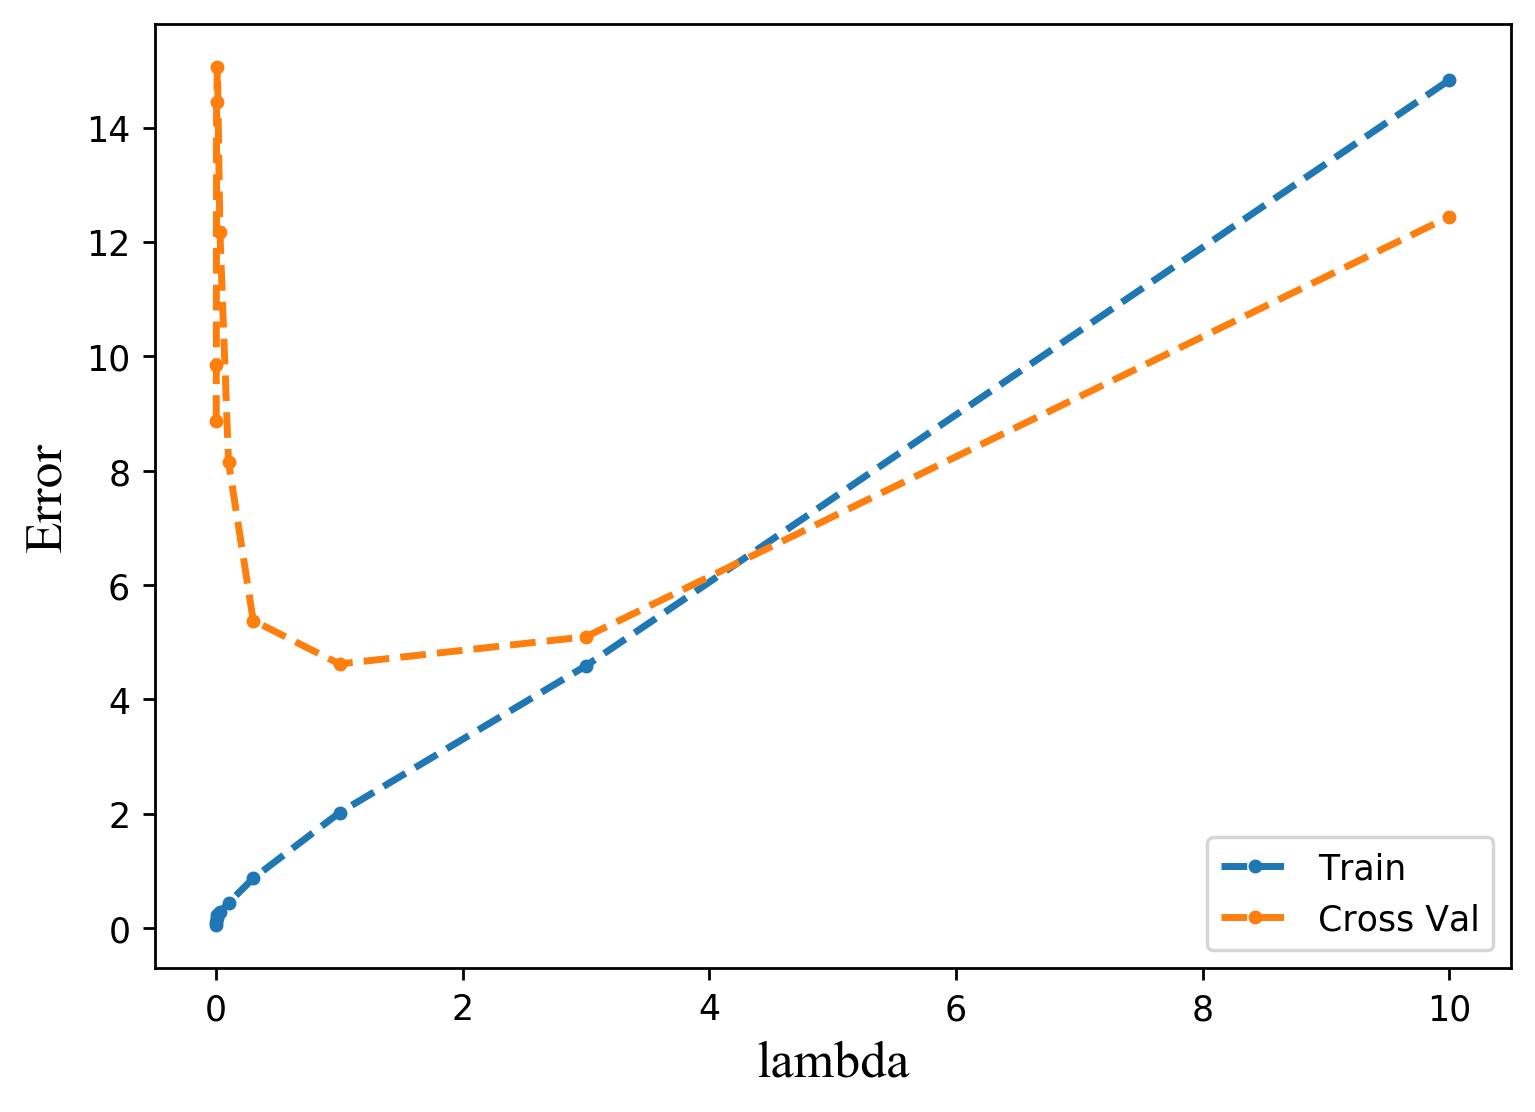

In [32]:
l_candidate = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
training_cost, cv_cost = [], []

for l in l_candidate:
    res = FittingLinearReg(X_poly, y, l)
    
    tc = linearRegCostFunction(res.x, X_poly, y, 0)
    cv = linearRegCostFunction(res.x, Xval_poly, yval, 0)
    
    training_cost.append(tc)
    cv_cost.append(cv)

fig = plt.figure(1, (7,5), dpi = 250)
ax = plt.subplot(111)
plt.sca(ax)
font = {'family' : 'Times New Roman','weight' : 'normal','size'   : 15}
plt.plot(l_candidate, training_cost, label='Train',marker='o', 
         linestyle='dashed', linewidth=2, markersize=3)
plt.plot(l_candidate, cv_cost, label='Cross Val',marker='o', 
         linestyle='dashed', linewidth=2, markersize=3)
# plt.(np.arange(1, m+1), error_train, label='training cost')
# plt.plot(np.arange(1, m+1), error_val, label='cv cost')
#     plt.ylim(0, 150)
plt.xlabel('lambda', font)
plt.ylabel('Error', font)
plt.legend(loc=4)

plt.show()

In [33]:
# best cv I got from all those candidates
l_candidate[np.argmin(cv_cost)]

1

In [34]:
# use test data to compute the cost
for l in l_candidate:
    theta = FittingLinearReg(X_poly, y, l).x
    print('test cost(l={}) = {}'.format(l, linearRegCostFunction(theta, Xtest_poly, ytest, 0)))

test cost(l=0) = 10.775787883340385
test cost(l=0.001) = 11.028866255467
test cost(l=0.003) = 11.309391047139302
test cost(l=0.01) = 10.987670662905607
test cost(l=0.03) = 10.221611299301467
test cost(l=0.1) = 8.95514428641307
test cost(l=0.3) = 7.744341005718674
test cost(l=1) = 7.961714189505294
test cost(l=3) = 11.93398491901057
test cost(l=10) = 26.900972026696756
